In [2]:
import serial
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [58]:
#/dev/tty.usbmodem141403
ser = serial.Serial(port = '/dev/tty.usbmodem141403', baudrate=9600, timeout=0.01)
for i in range(100):
    print(ser.readline())
ser.close()

b' 8192  y: 10  z: 0\r\n'
b'x: -10  y: -231  z: 197\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -32  y: -202  z: 175\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -14  y: -228  z: 209\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -107  y: -247  z: 144\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -121  y: -180  z: 211\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -216  y: 36  z: 228\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -147  y: -244  z: 197\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: 14  y: 250  z: -245\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -133  y: -198  z: 234\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -229  y: 54  z: 246\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -53  y: -3  z: -89\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -112  y: -205  z: 237\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -89  y: -2  z: -97\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -55  y: -253  z: 213\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -77  y: -235  z: 218\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -42  y: -26  z: -8\r\n'
b'x: 8192  y: 10  z: 0\r\n'
b'x: -103  y: -215  z: 235\r\n'
b'

In [65]:
def get_data(data):
    data = str(data)
    try:
        if data[2] == 'x':
            data = data.split(' ')
            x = int(data[1])
            y = int(data[3])
            z = int(data[5][:-5])
            return x, y, z
    except:
        pass
    return None, None, None
ser = serial.Serial(port = '/dev/tty.usbmodem141403', baudrate=9600, timeout=1)
x = []
y = []
z = []
for i in range(200):
    data = ser.readline()
    x_data, y_data, z_data = get_data(data)
    if x_data != None:
        x.append(x_data)
        y.append(y_data)
        z.append(z_data)
ser.close()
print('done')
print('Y: ',x)
print('Pos:',y)
print('Change:',z)
    

done
Y:  [-144, 8192, -68, 8192, 181, 8192, -132, 8192, 203, 8192, 238, 8192, -51, 8192, -122, -125, 8192, -252, 8192, -110, 8192, -78, 8192, -55, 8192, -30, 8192, -72, 8192, -90, 8192, -108, 8192, -125, 8192, -60, 8192, -246, 8192, -95, 8192, -84, 8192, -36, 8192, -115, 8192, 221, 8192, -112, 8192, -81, 8192, 181, 8192, -120, 8192, -137, 8192, -100, 8192, -49, 8192, -57, 8192, -95, 8192, -8, 8192, -114, 8192, -43, 8192, -126, 8192, -42, 8192, -100, 8192, -89, 8192, -62, 8192, -245, 8192, -117, 8192, -84, 8192, -127, 8192, -65, 8192, -13, 8192, -118, 8192, -66, 8192, -56, 8192, -114, 8192, -421, 8192, -210, 8192, 336, 8192, -71, 8192, 684, 8192, -59, 8192, -254, 8192, -257, 8192, -137, 8192, -8, 8192, -54, 8192, -52, 8192, -62, 8192, 191, 8192, -146, 8192, -448, 8192, -30, 8192, -125, 8192, -138, 8192, -74, 8192, -164, 8192, -84, 8192, -92, 8192, -234, 8192, -84, 8192, -76, 8192, -53, 8192, -84, 8192, -83, 8192, -155, 8192, -80, 8192, -42, 8192, -242, 8192, -112, 8192, 173, 8192, -5, 8

NameError: name 'x' is not defined

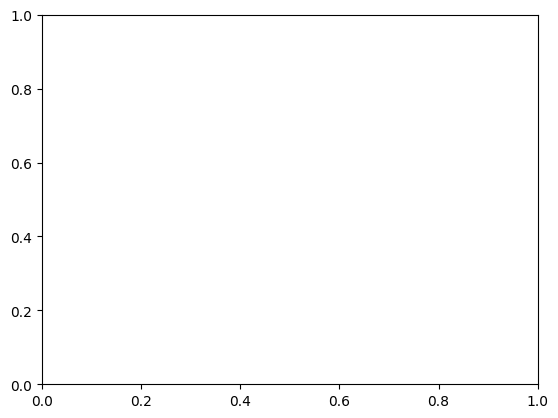

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, color='red')
ax.plot(y, color='blue')
ax.plot(z, color='green')

ax.legend(['x', 'y', 'z'])
ax.set_ylim(-40000, 40000)

In [ ]:
#random data

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
t = []
x = []
y = []
z = []

def animate_x(i, t, x):
    ser = serial.Serial(port = '/dev/tty.usbmodem141403', baudrate=9600, timeout=1)
    data = ser.readline()
    ser.close()

    x_data, y_data, z_data = get_data(data)
    if x_data != None:
        t.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
        x.append(x_data)

    t = t[-20:]
    x = x[-20:]
    ax.clear()
    ax.plot(t, x)
    

529 Data points recorded over 11.98 seconds
Average time between data points: 22.64 ms
Average data points per second: 44.17
Avergae recording frequency: 0.04 Hz


(4.0, 5.0)

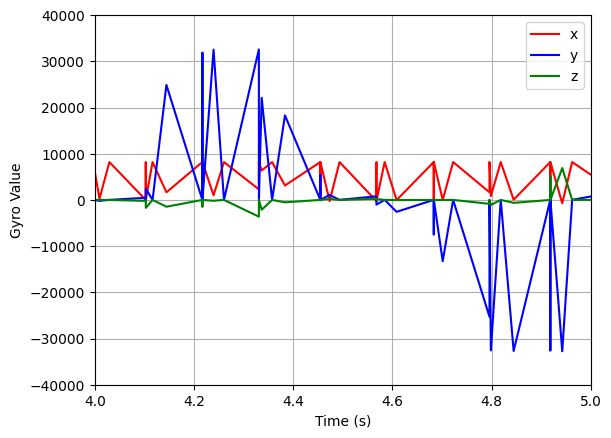

In [69]:
def readData(fileName):
    f = open(fileName, 'r')
    data = f.read()
    data = data.split('\n')
    x = []
    y = []
    z = []
    t = []
    for i in range(len(data)):
        data[i] = data[i].split(' ')
        try:
            x.append(int(data[i][0]))
            y.append(int(data[i][1]))
            z.append(int(data[i][2]))
            t.append(float(data[i][3]))
        except:
            pass

    return x, y, z, t

x, y, z, t = readData('data.txt')
print("{:} Data points recorded over {:.2f} seconds".format(len(x), t[-1]))
print("Average time between data points: {:.2f} ms".format(1000 * t[-1] / len(x)))
print("Average data points per second: {:.2f}".format(len(x) / t[-1]))
print("Avergae recording frequency: {:.2f} Hz".format(1 / (1000 * t[-1] / len(x))))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, x, color='red')
ax.plot(t, y, color='blue')
ax.plot(t, z, color='green')

ax.legend(['x', 'y', 'z'])
ax.grid(True)
ax.set_ylabel('Gyro Value')
ax.set_xlabel('Time (s)')

ax.set_ylim(-40000, 40000)
ax.set_xlim(4, 5)

/var/folders/5n/cv41vwzn2msgm5_27wdr3ytr0000gn/T/ipykernel_83991/2392382826.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


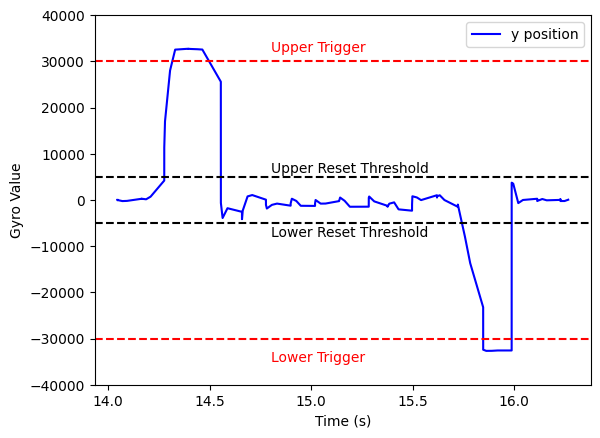

In [8]:
t_ = np.array(t)
y_ = np.array(y)

a = (t_ > 14) & (t_ < 16.3)
y_ = y_[a]
t_ = t_[a]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_, y_, color='blue')
ax.axhline(y=5000, color='black', linestyle='--')
ax.axhline(y=-5000, color='black', linestyle='--')
ax.axhline(y=30000, color='red', linestyle='--')
ax.axhline(y=-30000, color='red', linestyle='--')


ax.set_ylim(-40000, 40000)
# ax.set_xlim(14,16.3)

ax.set_ylabel('Gyro Value')
ax.set_xlabel('Time (s)')
ax.legend(['y position'])
ax.text(14.8, 32000, 'Upper Trigger', color='red')
ax.text(14.8, -35000, 'Lower Trigger', color='red')
ax.text(14.8, 6000, 'Upper Reset Threshold', color='black')
ax.text(14.8, -8000, 'Lower Reset Threshold', color='black')
fig.show()

ValueError: x and y must have same first dimension, but have shapes (6659,) and (199,)

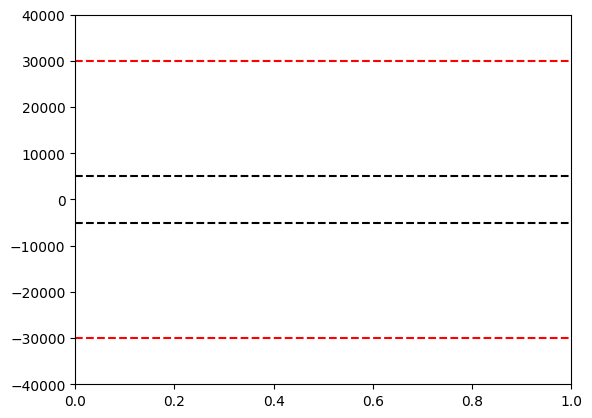

In [53]:

def determineYPos(y_data, pastPos, allow_change=True, change_trigger=30000, reset_trigger=5000):
    newPastPos = pastPos
    if y_data >= change_trigger and allow_change:
        if pastPos == 'center':
            newPastPos = 'right'
        elif pastPos == 'left':
            newPastPos = 'center'
        allow_change = False
    elif y_data <= -change_trigger and allow_change:
        if pastPos == 'center':
            newPastPos = 'left'
        elif pastPos == 'right':
            newPastPos = 'center'
        allow_change = False
    elif abs(y_data) <= reset_trigger:
        allow_change = True
        
    return newPastPos, allow_change

position = 'center'
past = position
allow_change = True
changes = []
for indx, i in enumerate(y):
    position, allow_change = determineYPos(i, position, allow_change)
    if position != past:
        changes.append((indx, position))
    past = position


#plot the thing with changes text

fig_ = plt.figure()
ax_ = fig_.add_subplot(1, 1, 1)

for a in changes:
    indx = a[0]
    pos = a[1]
    if y[indx] > 0:
        ax_.text(t[indx], 35000, pos[0].upper(), color='green')
    else:
        ax_.text(t[indx], -36000, pos[0].upper(), color='green')


ax_.text(8.2, 32000, 'Upper Trigger', color='red')
ax_.text(5.7, -35000, 'Lower Trigger', color='red')
ax_.text(8.2, 6000, 'Upper Reset ', color='black')
ax_.text(5.7, -8000, 'Lower Reset ', color='black')

ax_.axhline(y=5000, color='black', linestyle='--')
ax_.axhline(y=-5000, color='black', linestyle='--')
ax_.axhline(y=30000, color='red', linestyle='--')
ax_.axhline(y=-30000, color='red', linestyle='--')

ax_.set_ylim(-40000, 40000)

ax_.plot(t, y, color='blue')
fig.show()